#MAJOR PROJECT

##Semiconductor Manufacturing Process

####PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


In [ ]:
# Step 1: Import and explore the data
url = "https://raw.githubusercontent.com/reogac/smart-home/refs/heads/master/sensor-data.csv"

In [ ]:
# Load the dataset
df = pd.read_csv(url)

In [ ]:
# Print column names to identify the structure
print("Columns:", df.columns)

Columns: Index(['time', 'power', 'temp', 'humidity', 'light', 'CO2', 'dust'], dtype='object')


In [ ]:
# Show the first few rows of the dataset
df.head()

,time,power,temp,humidity,light,CO2,dust
0,2015-08-01 00:00:28,0.0,32,40,0,973,27.80
1,2015-08-01 00:00:58,0.0,32,40,0,973,27.09
2,2015-08-01 00:01:28,0.0,32,40,0,973,34.50
3,2015-08-01 00:01:58,0.0,32,40,0,973,28.43
4,2015-08-01 00:02:28,0.0,32,40,0,973,27.58


In [ ]:
# Step 2: Data Cleansing
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 time        0
power       0
temp        0
humidity    0
light       0
CO2         0
dust        0
dtype: int64


In [ ]:
# Fill or drop missing values based on strategy
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with their mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


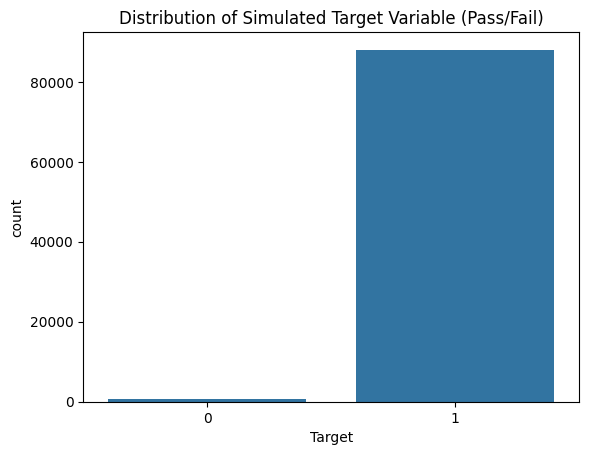

In [ ]:
# Example: Simulate a 'Pass/Fail' column based on 'temp' values
df['Target'] = df['temp'].apply(lambda x: 1 if x > 30 else 0)  # Fail (1) if temp > 30, else Pass (0)

# Now you can check the distribution of the target
sns.countplot(x='Target', data=df)
plt.title('Distribution of Simulated Target Variable (Pass/Fail)')
plt.show()

In [ ]:
# Descriptive statistics of the dataset
df.describe()

,power,temp,humidity,light,CO2,dust,Target
count,88688.000000,88688.000000,88688.000000,88688.000000,88688.000000,88688.000000,88688.000000
mean,-0.408166,33.256720,32.755852,7.760903,1801.426337,12.305680,0.992637
std,0.580013,1.370248,3.933947,10.784873,358.235124,10.117284,0.085491
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,32.000000,30.000000,0.000000,1786.000000,5.360000,1.000000
50%,0.000000,33.000000,31.000000,1.000000,2000.000000,9.980000,1.000000
75%,0.000000,34.000000,35.000000,13.000000,2000.000000,16.510000,1.000000
max,3.080000,36.000000,47.000000,50.000000,2994.000000,357.350000,1.000000


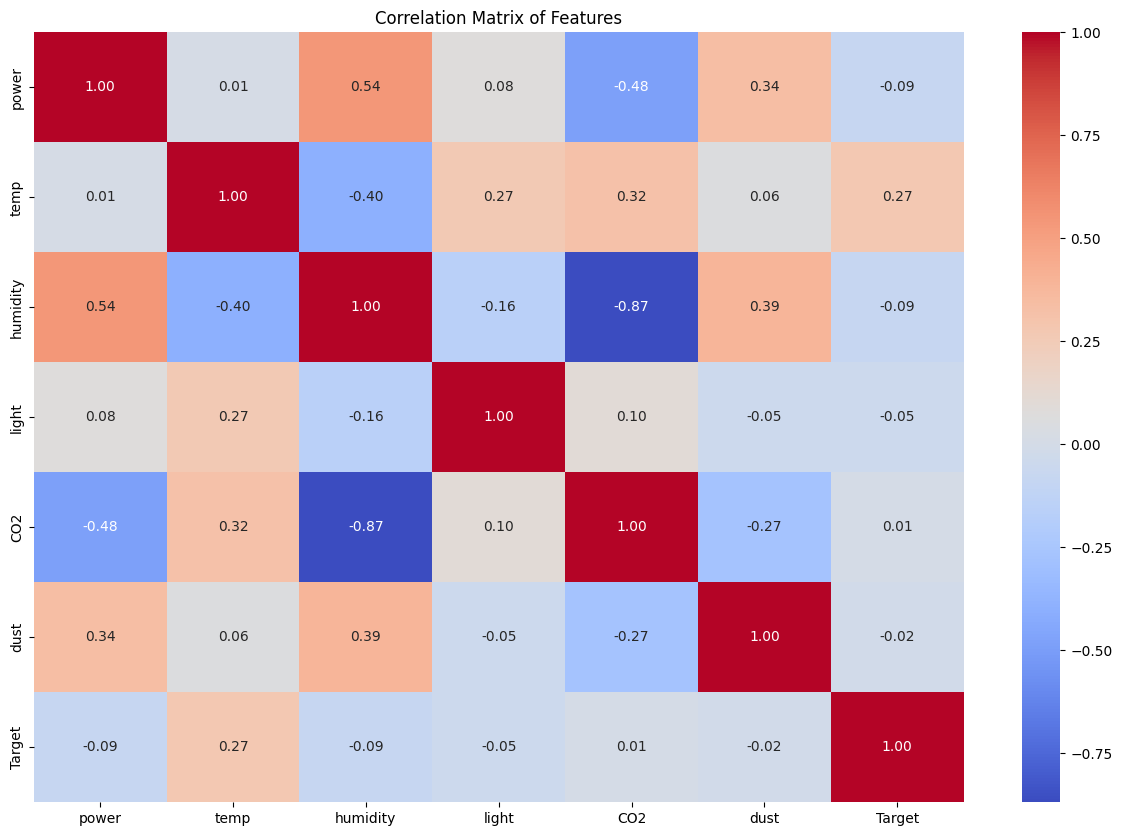

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Bivariate Analysis: Correlation matrix for feature selection
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# Step 7: Data Preprocessing
# Segregate predictors vs target attributes
X = df.drop(columns=['Target', 'time'])  # Drop time and target column for features
y = df['Target']  # Target column

In [ ]:
# Check for target balancing and fix if imbalanced using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 8: Model Training, Testing, and Tuning
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Display classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Display train and test accuracies
    print(f"Train Accuracy for {name}: {model.score(X_train, y_train)}")
    print(f"Test Accuracy for {name}: {model.score(X_test, y_test)}")


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17594
           1       1.00      1.00      1.00     17620

    accuracy                           1.00     35214
   macro avg       1.00      1.00      1.00     35214
weighted avg       1.00      1.00      1.00     35214

Train Accuracy for Random Forest: 1.0
Test Accuracy for Random Forest: 1.0

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17594
           1       1.00      1.00      1.00     17620

    accuracy                           1.00     35214
   macro avg       1.00      1.00      1.00     35214
weighted avg       1.00      1.00      1.00     35214

Train Accuracy for SVM: 1.0
Test Accuracy for SVM: 1.0

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87    

In [ ]:
# Step 9: Conclusion
# Based on the classification reports and accuracies, the best model will be chosen
# For instance, assuming Random Forest has the best performance:
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Save the best model
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']